In [83]:
import pandas as pd
import numpy as np
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq, fft, ifft
from numpy.random import uniform
from math import sin, pi
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
sns.set(rc={'figure.figsize': (12,8)})

## 50 Hz filtering with fft

In [97]:
df = pd.read_csv("/home/alex/Загрузки/30_1_2020_17_7_7.dat", sep="\t", 
                 names=['ch0', 'ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9']) \
                .reset_index()

In [98]:
df = df.drop(['ch7', 'ch8', 'ch9', 'index'], axis=1) # drop fake channels

In [99]:
df = df[df.columns][:6000]

In [100]:
df

,ch0,ch1,ch2,ch3,ch4,ch5,ch6
0,1016,785,599,1011,477,348,89
1,474,558,523,613,426,622,494
2,852,755,500,1014,361,723,566
3,681,691,490,975,629,615,542
4,604,598,762,1001,620,560,513
...,...,...,...,...,...,...,...
5995,1016,787,572,457,503,385,490
5996,442,533,550,601,405,538,623
5997,716,625,650,751,344,707,662
5998,588,596,449,602,645,510,531


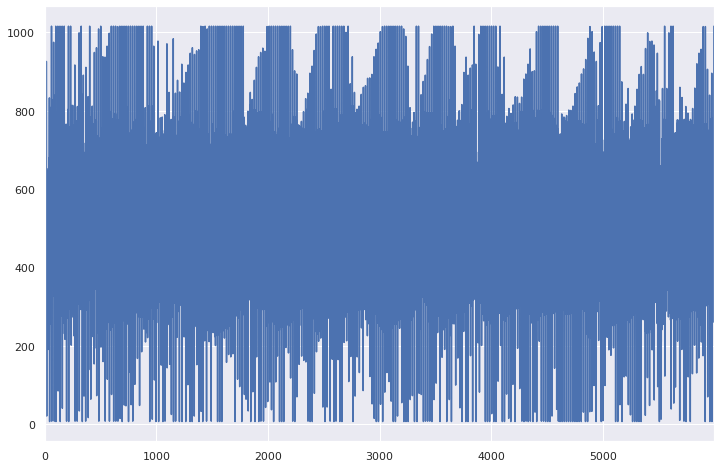

In [101]:
df["ch0"].plot()

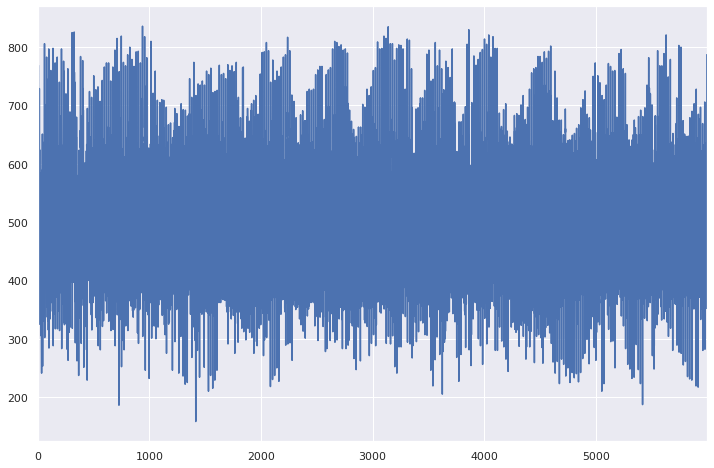

In [102]:
df.ch1.plot()

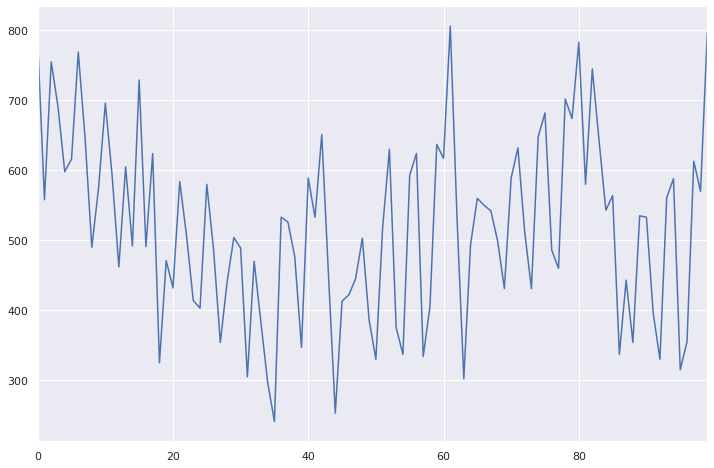

In [103]:
df["ch1"][:100].plot()

In [127]:
data = df.apply(fft)

In [108]:
data.head()

,ch0,ch1,ch2,ch3,ch4,ch5,ch6
0,3.062572e+06+0.000000e+00j,3.031207e+06+0.000000e+00j,3.075983e+06+0.000000e+00j,3.044601e+06+0.000000e+00j,3.064558e+06+0.000000e+00j,3.074088e+06+0.000000e+00j,3.008651e+06+0.000000e+00j
1,-5.258636e+03-2.222669e+03j,-1.746891e+03+3.946706e+02j,1.630213e+02+4.359561e+02j,1.315255e+03+1.017504e+03j,4.149512e+02+4.038432e+01j,-5.889334e+02-1.609236e+02j,-3.348515e+02-1.859233e+02j
2,6.070344e+03+9.610148e+02j,4.738728e+03+7.208293e+02j,-1.061969e+02+3.026207e+02j,-1.824579e+02-3.607472e+02j,1.658941e+03-6.988704e+02j,-1.838006e+02+3.035525e+02j,4.530621e+02-1.113387e+03j
3,6.964454e+03+1.935632e+03j,6.771468e+03+4.032870e+03j,9.911551e+02+1.204854e+02j,1.279894e+03-9.722403e+02j,1.550357e+03-3.729495e+02j,-7.244021e+02+4.191205e+02j,3.586837e+03+3.368282e+02j
4,-7.653517e+03+5.478590e+02j,-7.464278e+03+3.003057e+03j,-3.588879e+02-5.625067e+02j,2.551501e+03+3.602785e+03j,8.109549e+02-8.896757e+02j,-8.281237e+02+1.882228e+02j,-2.363755e+03+5.802930e+03j


/home/alex/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


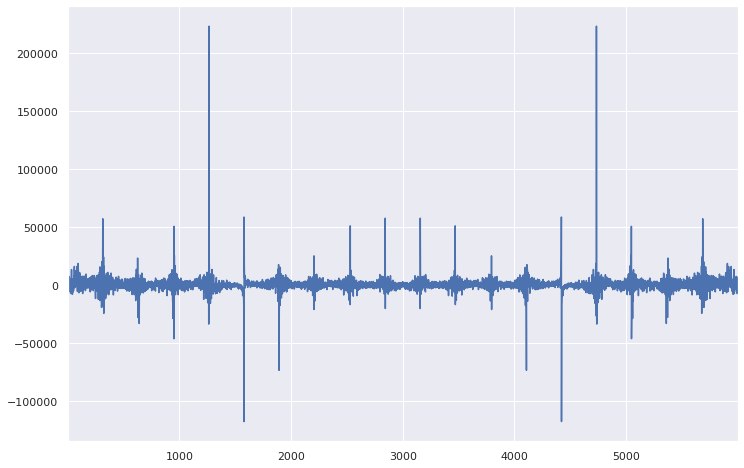

In [109]:
pd.Series(data.ch1)[1:].plot()

In [110]:
X = np.linspace(0, np.pi, 6000)
y = np.sin(50 * X)

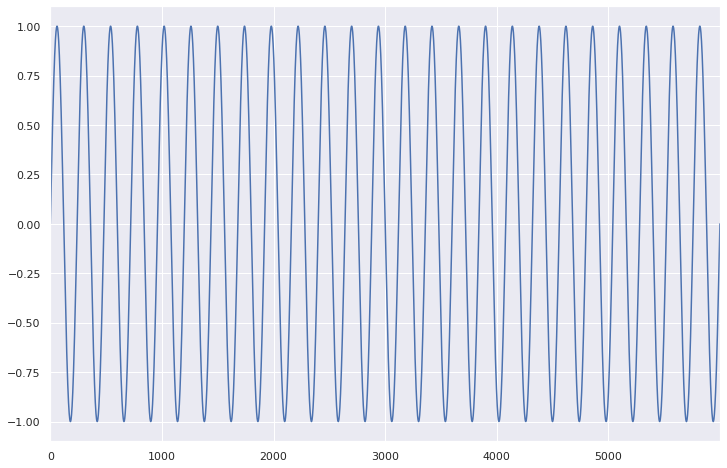

In [111]:
pd.Series(y).plot()

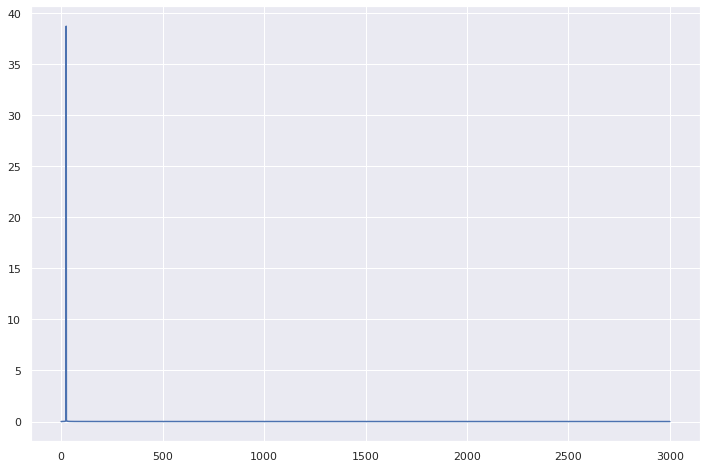

In [112]:
fourier = np.fft.rfft(y, norm='ortho')
plt.plot(np.abs(fourier))

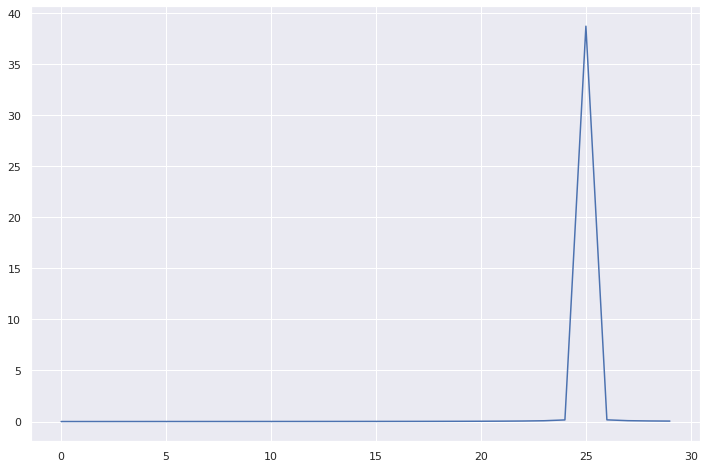

In [123]:
plt.plot(np.abs(fourier)[:30])

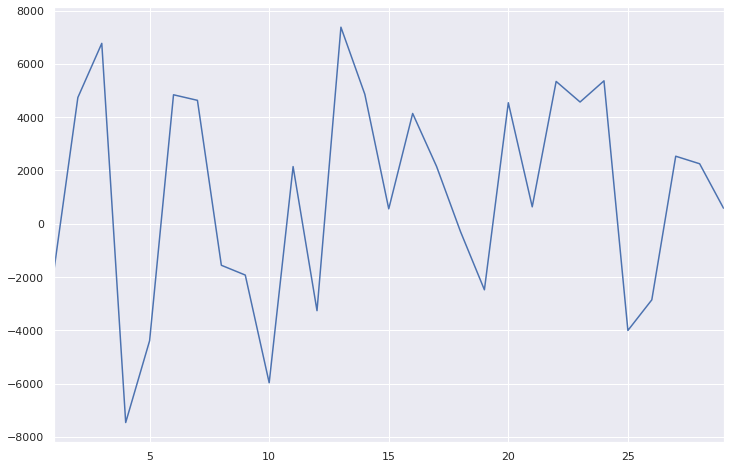

In [128]:
pd.Series(data.ch1)[1:30].plot()

In [134]:
for idx in data.columns:
    data[idx][25] = 0

/home/alex/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


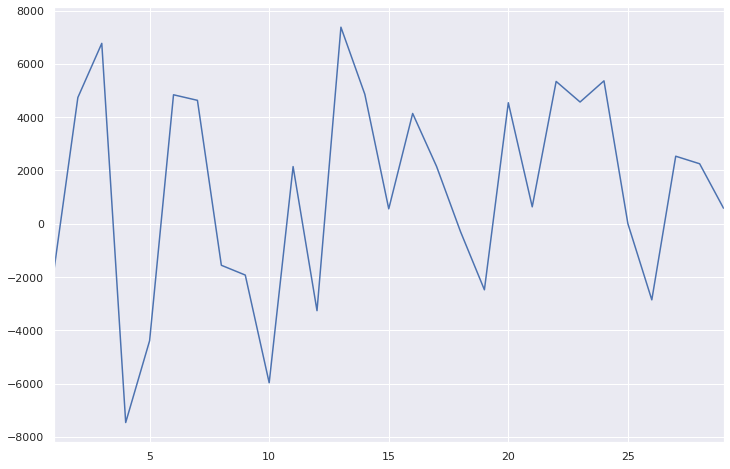

In [136]:
pd.Series(data.ch1)[1:30].plot()

In [137]:
newData = data * 2

In [140]:
newData.head()

,ch0,ch1,ch2,ch3,ch4,ch5,ch6
0,6.125144e+06+0.000000e+00j,6.062414e+06+0.000000e+00j,6.151966e+06+0.000000e+00j,6.089202e+06+0.000000e+00j,6.129116e+06+0.000000e+00j,6.148176e+06+0.000000e+00j,6.017302e+06+0.000000e+00j
1,-1.051727e+04-4.445339e+03j,-3.493781e+03+7.893412e+02j,3.260426e+02+8.719122e+02j,2.630511e+03+2.035007e+03j,8.299024e+02+8.076864e+01j,-1.177867e+03-3.218473e+02j,-6.697031e+02-3.718466e+02j
2,1.214069e+04+1.922030e+03j,9.477456e+03+1.441659e+03j,-2.123939e+02+6.052413e+02j,-3.649158e+02-7.214943e+02j,3.317883e+03-1.397741e+03j,-3.676012e+02+6.071050e+02j,9.061241e+02-2.226775e+03j
3,1.392891e+04+3.871263e+03j,1.354294e+04+8.065740e+03j,1.982310e+03+2.409708e+02j,2.559788e+03-1.944481e+03j,3.100714e+03-7.458990e+02j,-1.448804e+03+8.382409e+02j,7.173674e+03+6.736563e+02j
4,-1.530703e+04+1.095718e+03j,-1.492856e+04+6.006114e+03j,-7.177758e+02-1.125013e+03j,5.103002e+03+7.205570e+03j,1.621910e+03-1.779351e+03j,-1.656247e+03+3.764455e+02j,-4.727509e+03+1.160586e+04j


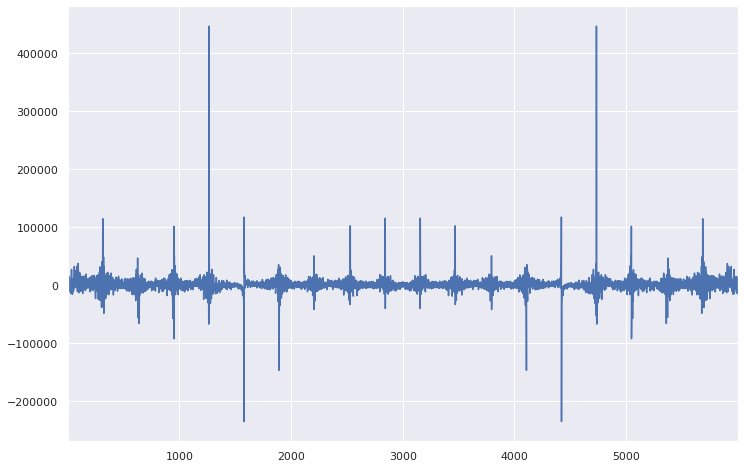

In [142]:
newData.ch1[1:].plot()

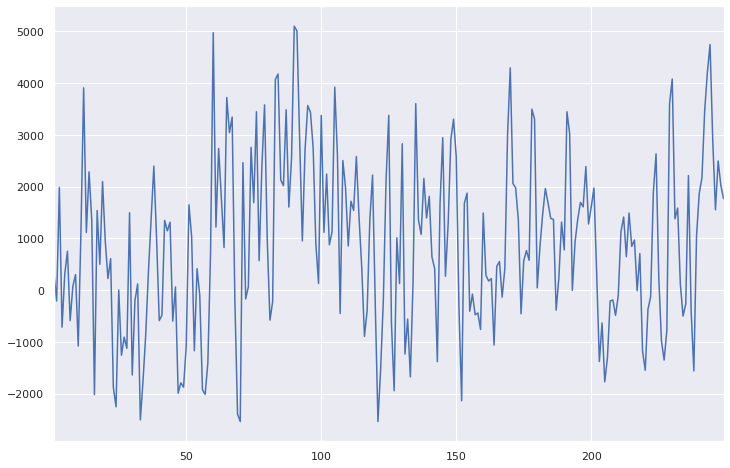

In [154]:
newData.ch2[1:250].plot()

In [146]:
reverseF = newData.apply(ifft)

In [148]:
reverseF.head()

,ch0,ch1,ch2,ch3,ch4,ch5,ch6
0,2032.410652+0.251433j,1571.335783-0.297749j,1198.197166+0.011439j,2017.636725-3.431134j,953.946594-0.112090j,696.982083+0.271432j,178.711991-0.279082j
1,948.403930+0.262096j,1117.343119-0.262680j,1046.196799+0.016597j,1221.728037-3.544175j,851.949546-0.113449j,1244.974641+0.297047j,988.719052-0.260349j
2,1704.396931+0.272580j,1511.349535-0.227431j,1000.196297+0.021742j,2023.822276-3.654788j,721.952534-0.114731j,1446.966531+0.322458j,1132.725621-0.241437j
3,1362.389659+0.282877j,1383.355026-0.192027j,980.195661+0.026873j,1945.919379-3.762895j,1257.955553-0.115935j,1230.957759+0.347648j,1084.731692-0.222360j
4,1208.382121+0.292980j,1197.359589-0.156490j,1524.194890+0.031986j,1998.019278-3.868424j,1239.958603-0.117058j,1120.948330+0.372600j,1026.737262-0.203130j


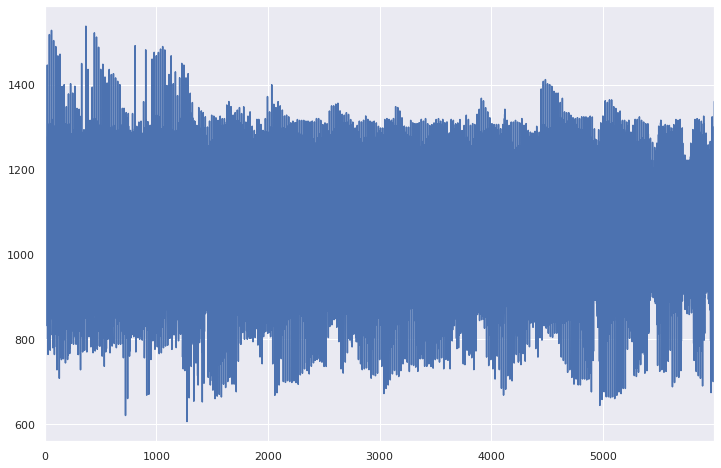

In [155]:
reverseF.ch2.plot()

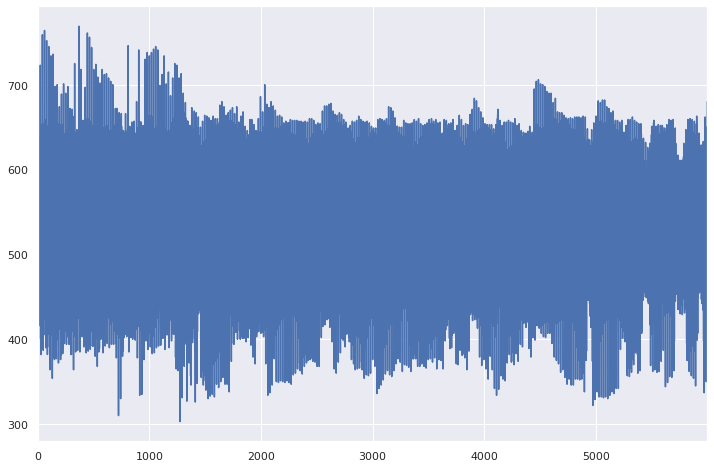

In [156]:
df.ch2.plot() # old 

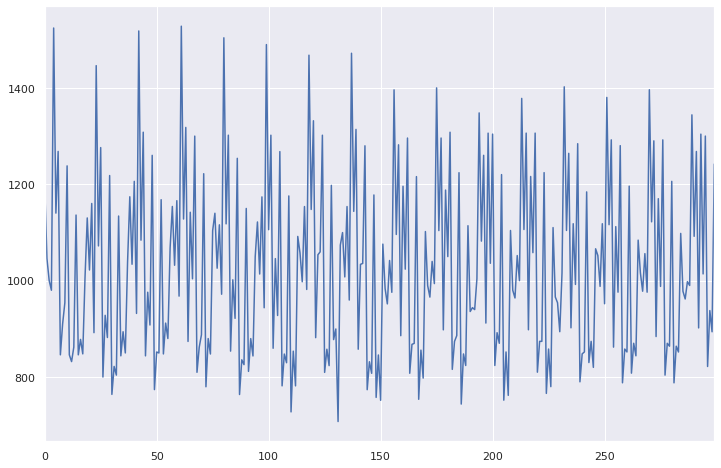

In [160]:
reverseF.ch2[:300].plot()

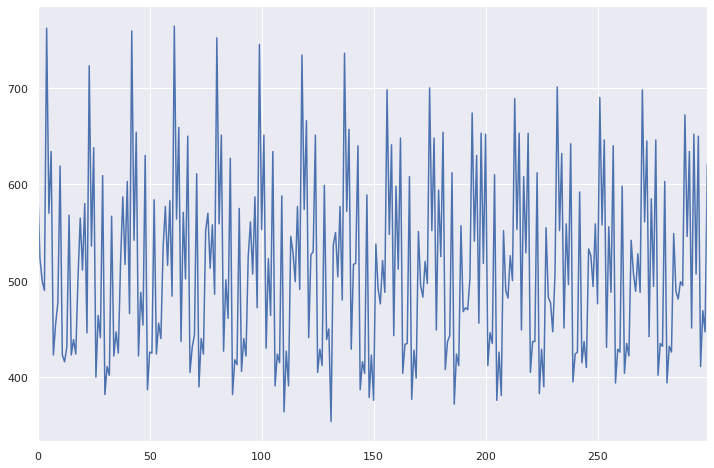

In [159]:
df.ch2[:300].plot() # old 